<a href="https://colab.research.google.com/github/Coresight-Adithya/Automated-Projections/blob/main/Home%20Furniture%20US/Prophet%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from prophet import Prophet
from pandas.tseries.offsets import MonthEnd
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
data_url ="https://raw.githubusercontent.com/Coresight-Adithya/Automated-Projections/main/Home%20Furniture%20Spending%20US/Home%20Furniture%20Spending.csv" 
data_name = "Furniture US"
df = pd.read_csv(data_url)
print(df)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') + MonthEnd(1)
df.columns = ['ds', 'y']
df['y'] = df['y'].astype(float)
df = df.dropna()

           Date       Sales 
0    01-01-2010  11543.25000
1    01-02-2010  11629.66667
2    01-03-2010  11830.91667
3    01-04-2010  11788.16667
4    01-05-2010  11743.33333
..          ...          ...
144  01-01-2022  25653.00000
145  01-02-2022  25913.50000
146  01-03-2022  25823.75000
147  01-04-2022  26016.08333
148  01-05-2022  25797.50000

[149 rows x 2 columns]


In [4]:
# COVID Outliers
covid_outlier_st = datetime.strptime('2020-03-31', '%Y-%m-%d').date()
covid_outlier_en = datetime.strptime('2020-05-31', '%Y-%m-%d').date()

df.loc[(df['ds'].dt.date >= covid_outlier_st) & (df['ds'].dt.date <= covid_outlier_en), 'y'] = None

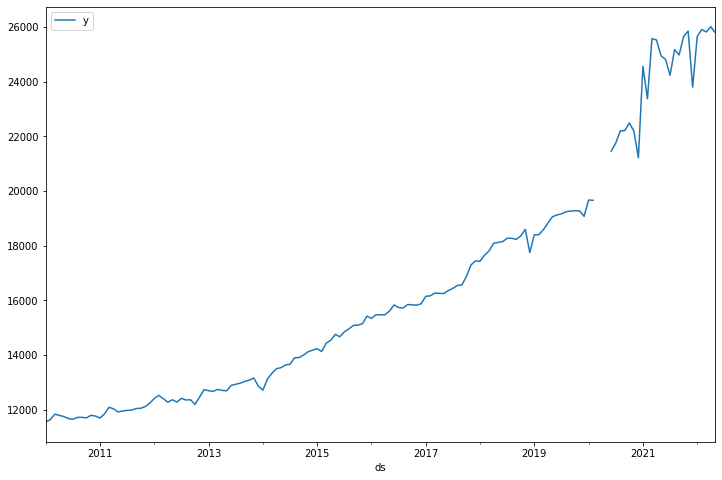

In [5]:
df.plot(x='ds', y='y', figsize=(12,8))

In [6]:
season_mode = "multiplicative"

In [7]:
# Facebook Prophet Model
model = Prophet(seasonality_mode=season_mode, daily_seasonality=False, weekly_seasonality=False)
model.fit(df)

12:16:41 - cmdstanpy - INFO - Chain [1] start processing
12:16:41 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Make future dates
future = model.make_future_dataframe(periods=68, freq='M')
future = future[future['ds'].dt.year <= datetime.now().year+6]
future

,ds
0,2010-01-31
1,2010-02-28
2,2010-03-31
3,2010-04-30
4,2010-05-31
...,...
212,2027-09-30
213,2027-10-31
214,2027-11-30
215,2027-12-31


In [9]:
# Forecast
forecast = model.predict(future)

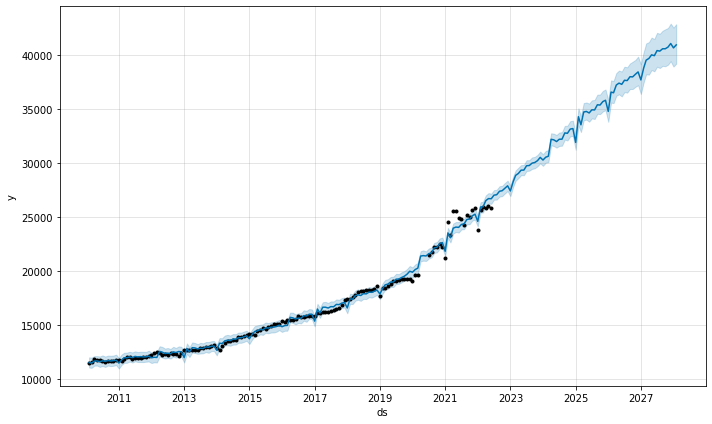

In [10]:
model.plot(forecast);

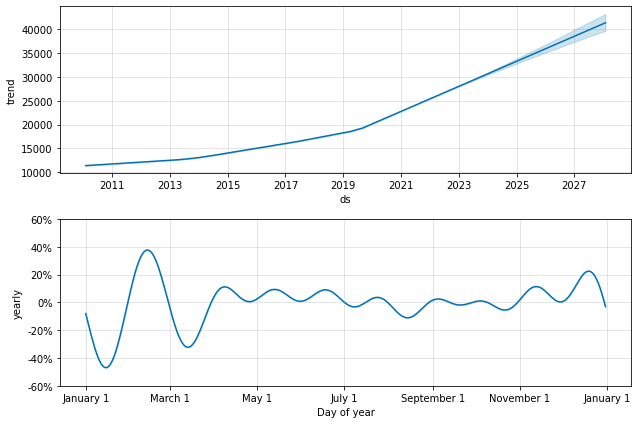

In [11]:
model.plot_components(forecast);

In [12]:
data_name = "Home Furniture Spending"
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].to_csv(data_name+'-Prophet-Predictions.csv')